In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Generate some sample data
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)  # Normal distribution
data = np.append(data, [150, 160, 170])  # Add some outliers

# Create a DataFrame
df = pd.DataFrame(data, columns=['value'])
df.head(5)

,value
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466


1. Box Plot

A box plot displays the distribution of data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. Outliers are often identified as points that lie outside the "whiskers" of the box plot.

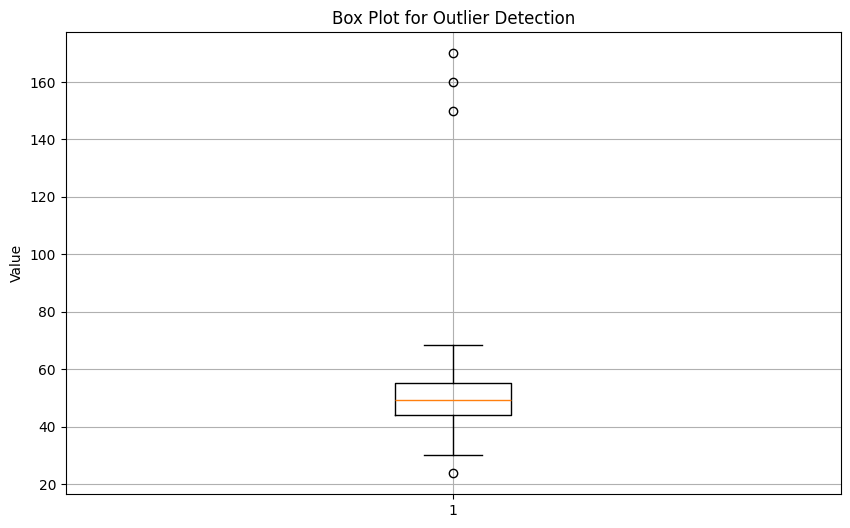

In [3]:
# Plot a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['value'])
plt.title('Box Plot for Outlier Detection')
plt.ylabel('Value')
plt.grid(True)
plt.show()


2. Histogram

A histogram shows the frequency distribution of a set of values. Outliers can be identified as values that lie in the tails of the distribution, especially if they are far from the bulk of the data.

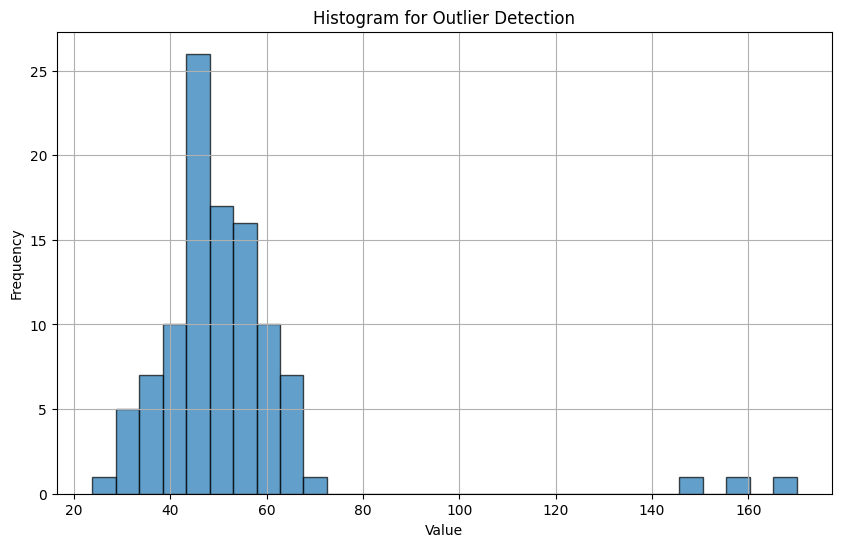

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(df['value'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram for Outlier Detection')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

3. Scatter Plot

A scatter plot can be useful for identifying outliers in bivariate data. If the data points form a clear pattern, outliers can be seen as points that deviate significantly from this pattern.

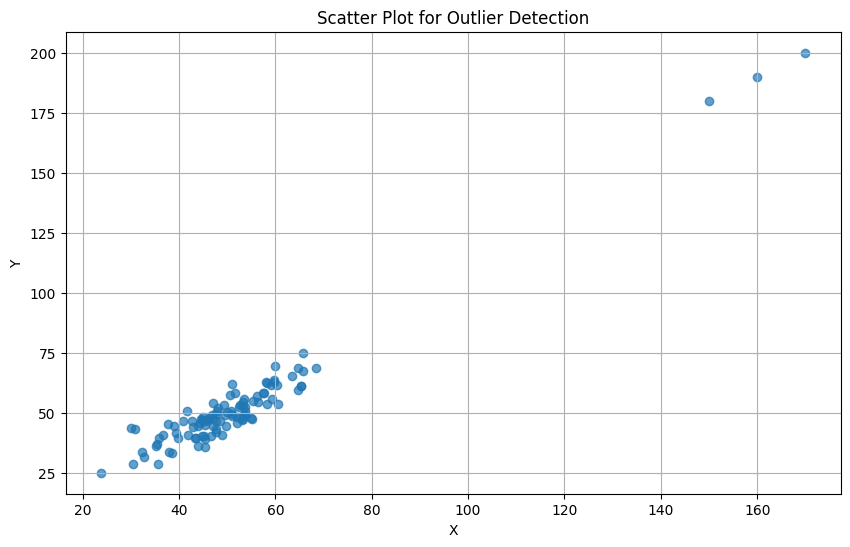

In [5]:
# Generate some bivariate data
np.random.seed(42)
x = np.random.normal(loc=50, scale=10, size=100)
y = x + np.random.normal(loc=0, scale=5, size=100)
x = np.append(x, [150, 160, 170])
y = np.append(y, [180, 190, 200])

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7)
plt.title('Scatter Plot for Outlier Detection')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

4. Z-Score Method

Assumption: Data should follow normal distribution

The Z-score method is a statistical method that standardizes the values in terms of their distance from the mean. A Z-score greater than 3 or less than -3 is often considered an outlier.

In [11]:
df.head(5)

,value
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466


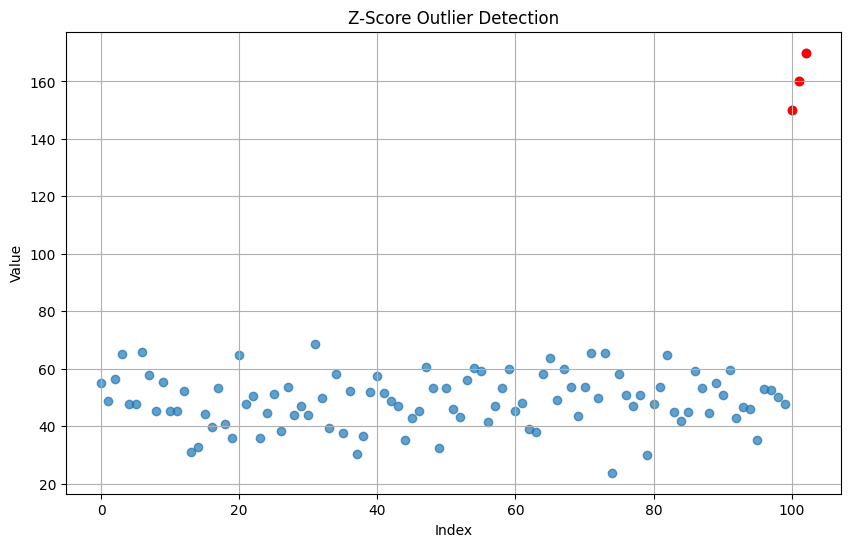

Outliers based on Z-score:
     value   z_score
100  150.0  4.717263
101  160.0  5.199579
102  170.0  5.681895


In [12]:
# Compute Z-scores
df['z_score'] = np.abs(stats.zscore(df['value']))

# Identify outliers
outliers = df[df['z_score'] > 3]

# Plot the data with outliers highlighted
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['value'], alpha=0.7)
plt.scatter(outliers.index, outliers['value'], color='red')
plt.title('Z-Score Outlier Detection')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Print outliers
print("Outliers based on Z-score:")
print(outliers)